In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Iris.csv')
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data.dtypes

,0
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [7]:
data.shape

(150, 5)

In [8]:
data.size

750

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [11]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
145,False
146,False
147,False
148,False


In [12]:
data.duplicated().sum()

np.int64(3)

In [13]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


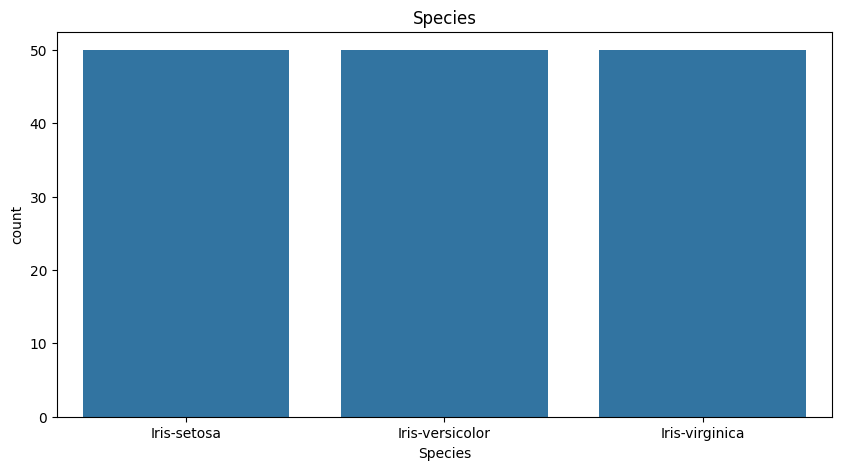

In [15]:
plt.figure(figsize = (10,5))
sns.countplot(data=data, x='Species')
plt.xlabel('Species')
plt.ylabel('count')
plt.title('Species')
plt.show()

<Axes: >

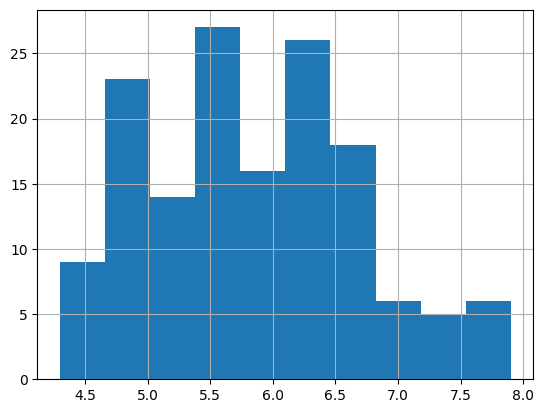

In [16]:
data['SepalLengthCm'].hist()

<Axes: >

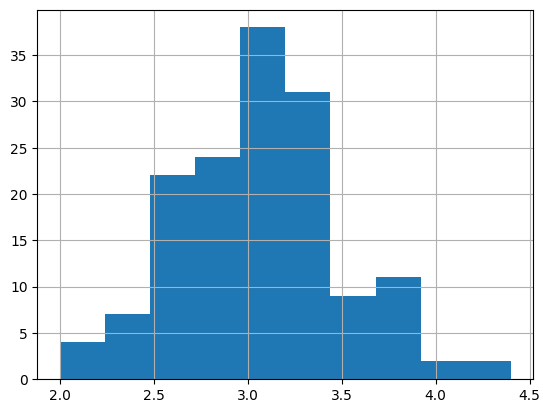

In [17]:
data['SepalWidthCm'].hist()

<Axes: >

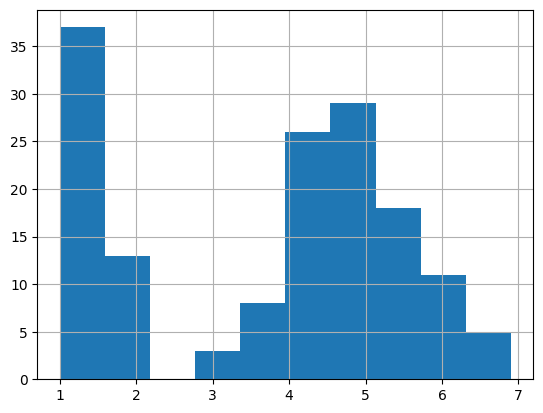

In [18]:
data['PetalLengthCm'].hist()

<Axes: >

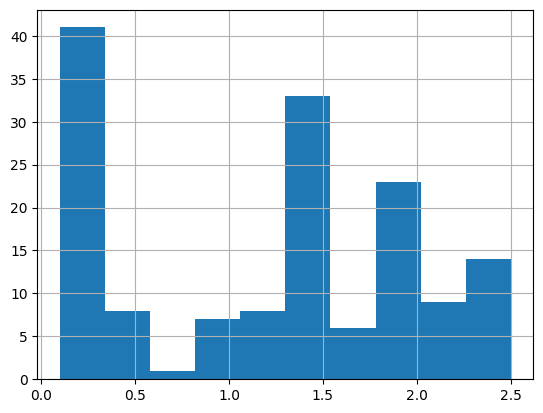

In [19]:
data['PetalWidthCm'].hist()

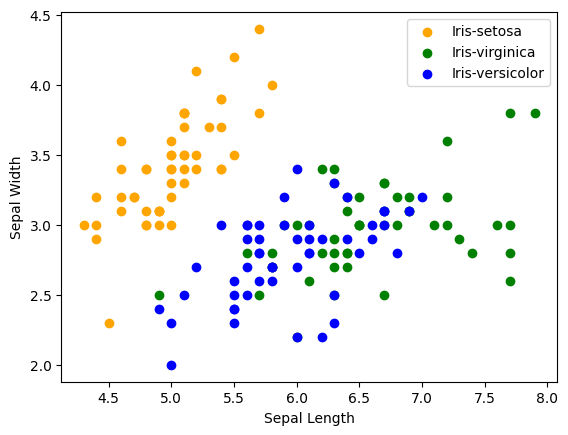

In [20]:
colors = ['orange', 'Green', 'blue']
species = ['Iris-setosa','Iris-virginica','Iris-versicolor']
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

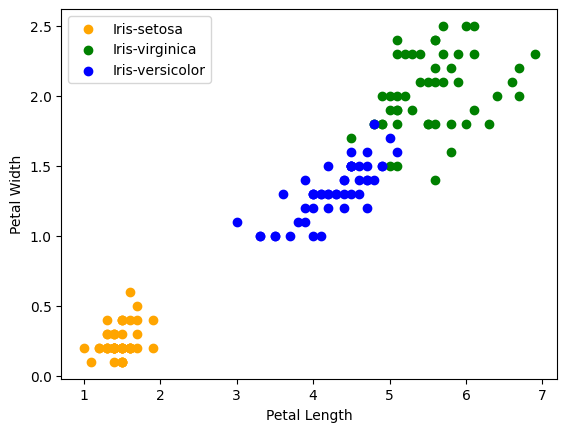

In [21]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

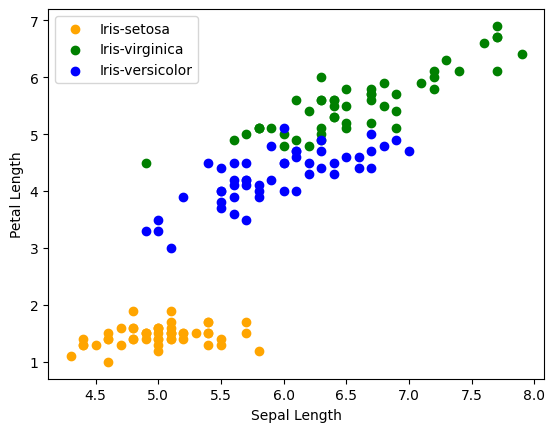

In [22]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()


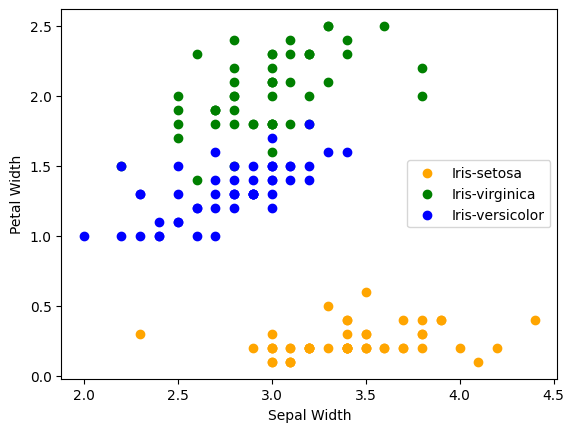

In [23]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

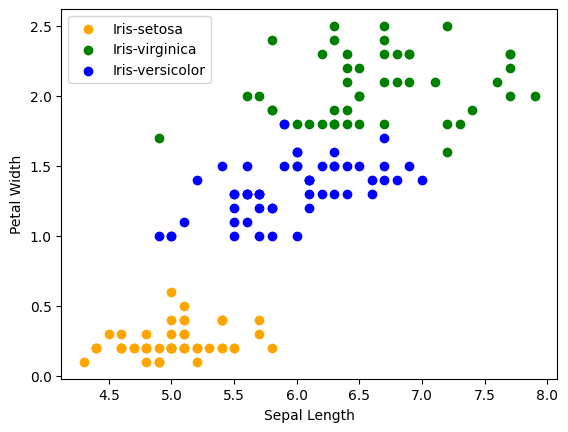

In [24]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Width")
    plt.legend()

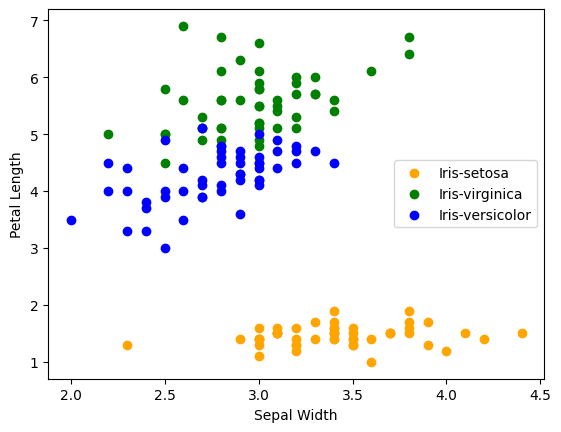

In [25]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Length")
    plt.legend()

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

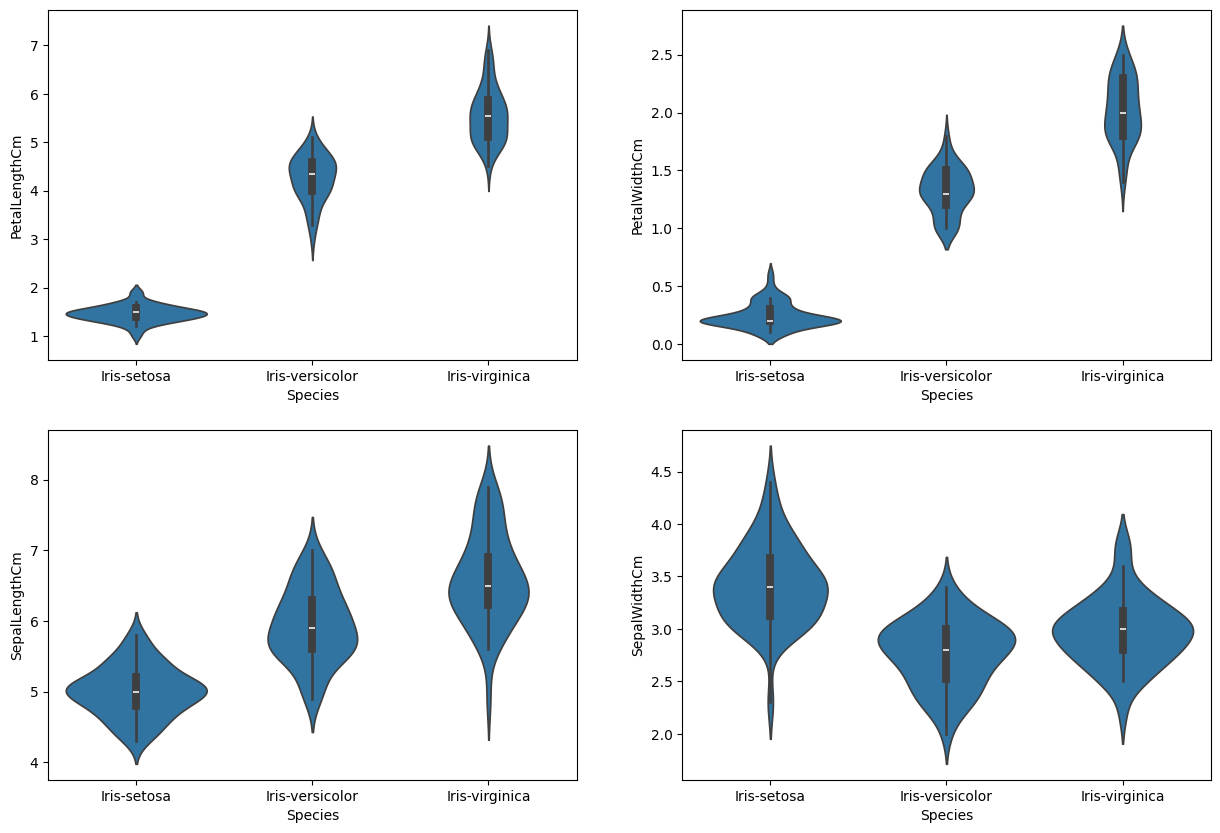

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

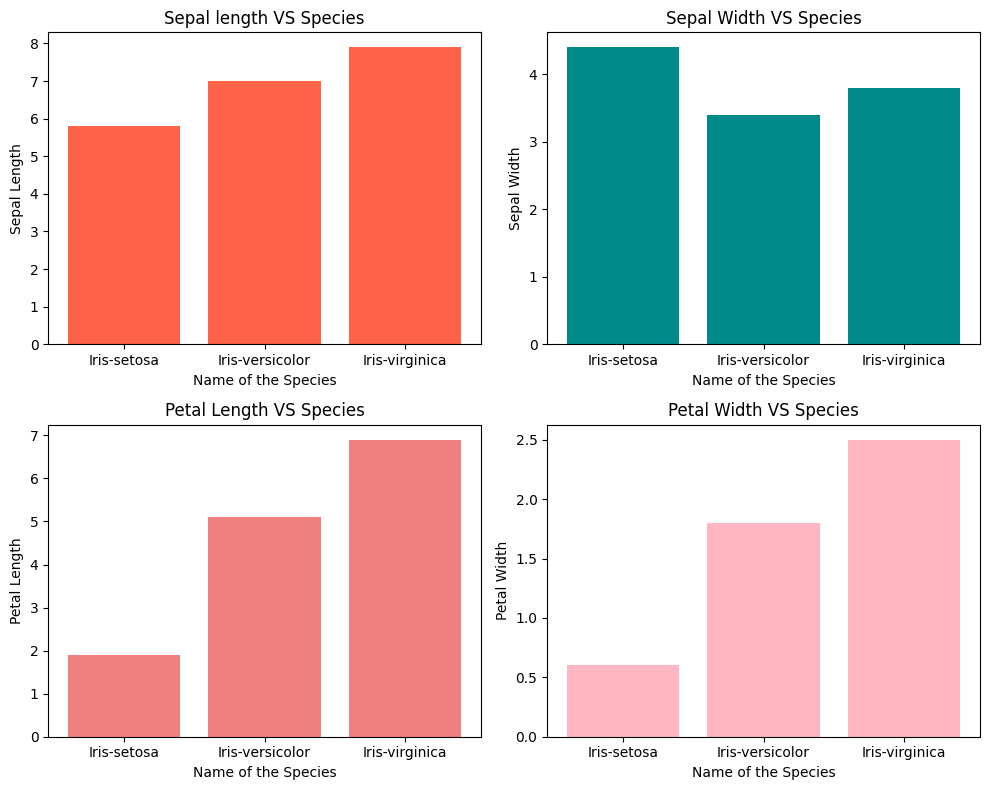

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].bar(data['Species'], data['SepalLengthCm'],color='tomato')
axs[0, 0].set_title("Sepal length VS Species")
axs[0, 0].set_xlabel("Name of the Species")
axs[0, 0].set_ylabel("Sepal Length")

axs[0, 1].bar(data['Species'], data['SepalWidthCm'],color='darkcyan')
axs[0, 1].set_title("Sepal Width VS Species")
axs[0, 1].set_xlabel("Name of the Species")
axs[0, 1].set_ylabel("Sepal Width")

axs[1, 0].bar(data['Species'], data['PetalLengthCm'],color='lightcoral')
axs[1, 0].set_title("Petal Length VS Species")
axs[1, 0].set_xlabel("Name of the Species")
axs[1, 0].set_ylabel("Petal Length")

axs[1, 1].bar(data['Species'], data['PetalWidthCm'],color='lightpink')
axs[1, 1].set_title("Petal Width VS Species")
axs[1, 1].set_xlabel("Name of the Species")
axs[1, 1].set_ylabel("Petal Width")

plt.tight_layout()
plt.show()

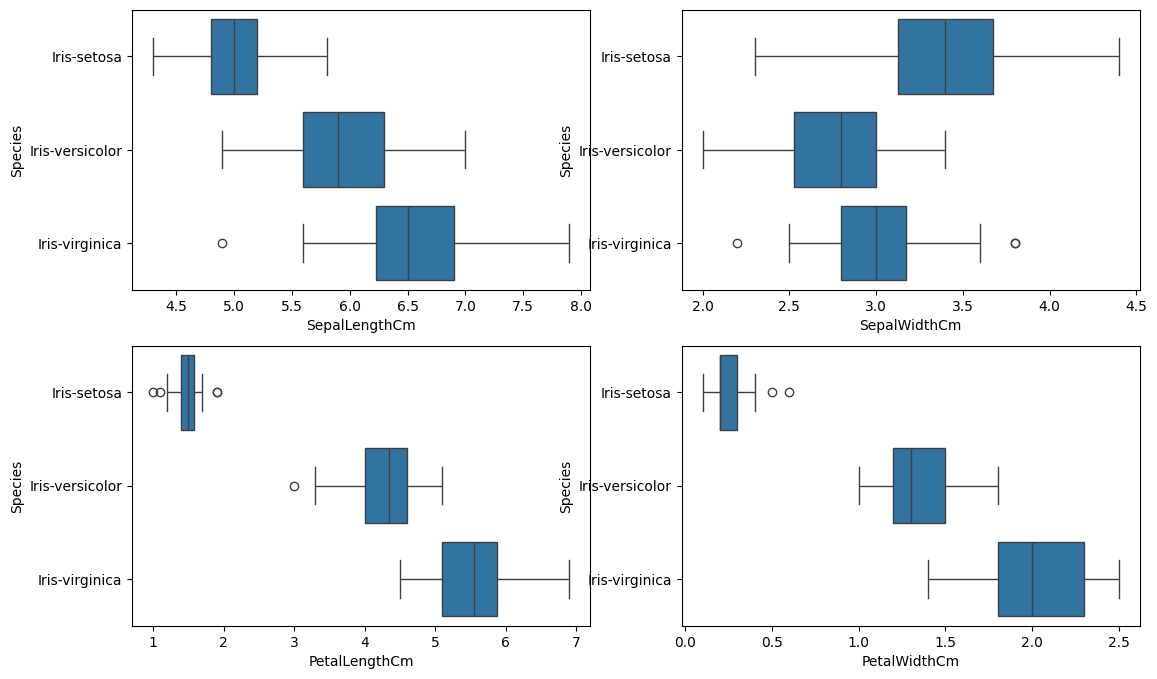

In [28]:
plt.figure(figsize = (13,8))
for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.boxplot(data = data, y = 'Species', x = z,orient = 'h')
plt.show()

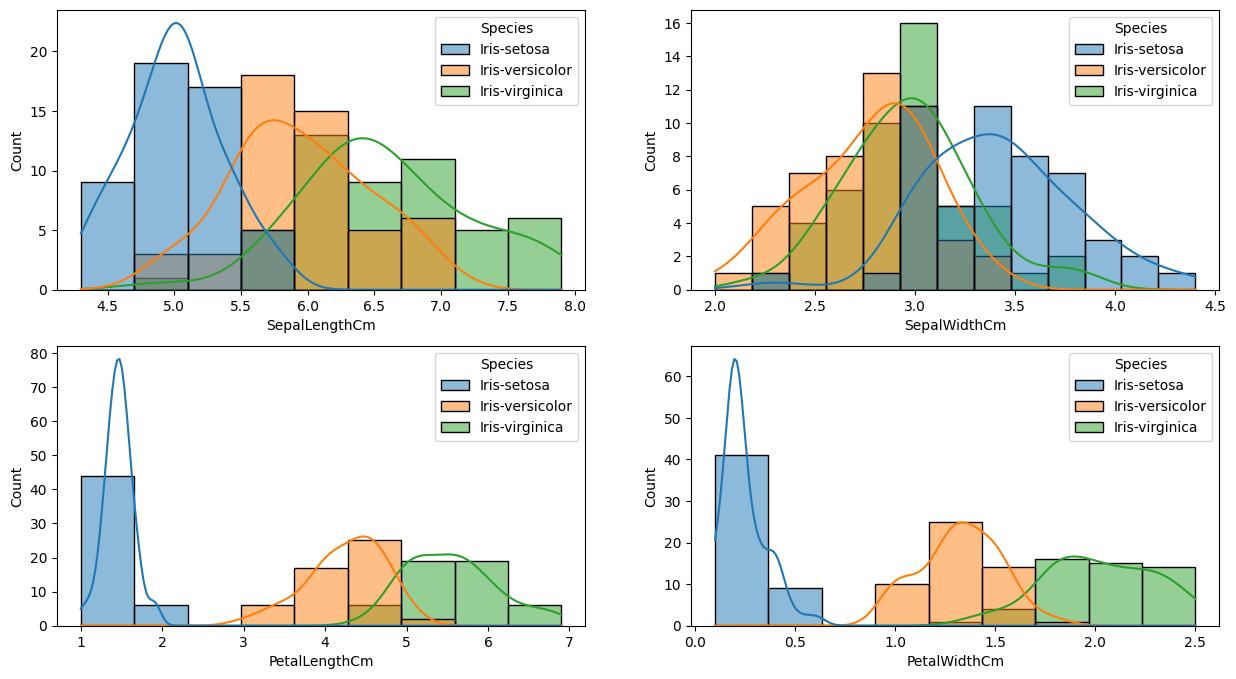

In [29]:
plt.figure(figsize = (15,8))
for i,z in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x = z,kde = True,hue = 'Species')
plt.show()

<Figure size 1500x800 with 0 Axes>

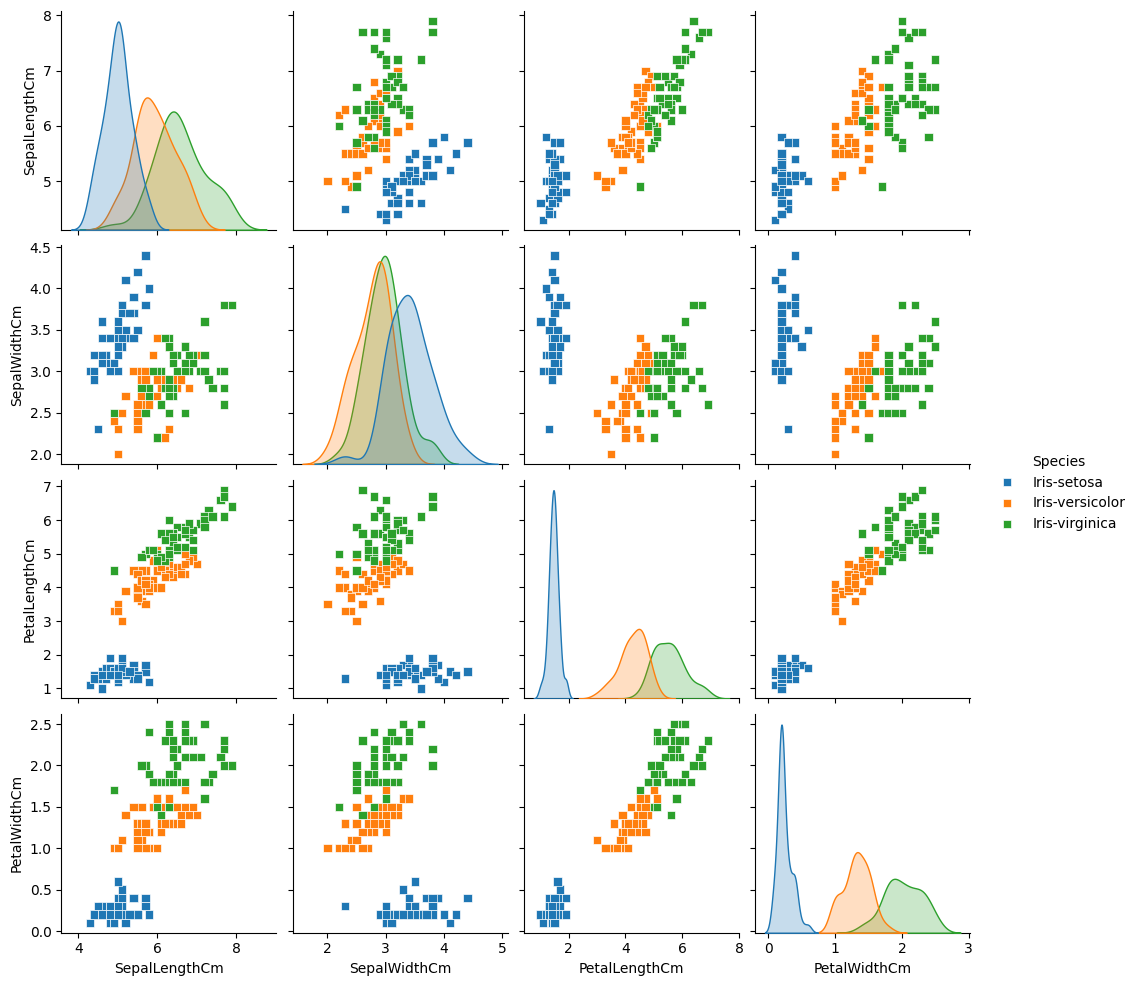

In [30]:
plt.figure(figsize = (15,8))
sns.pairplot(data = data , hue = 'Species',markers = "s")

<Figure size 1000x500 with 0 Axes>

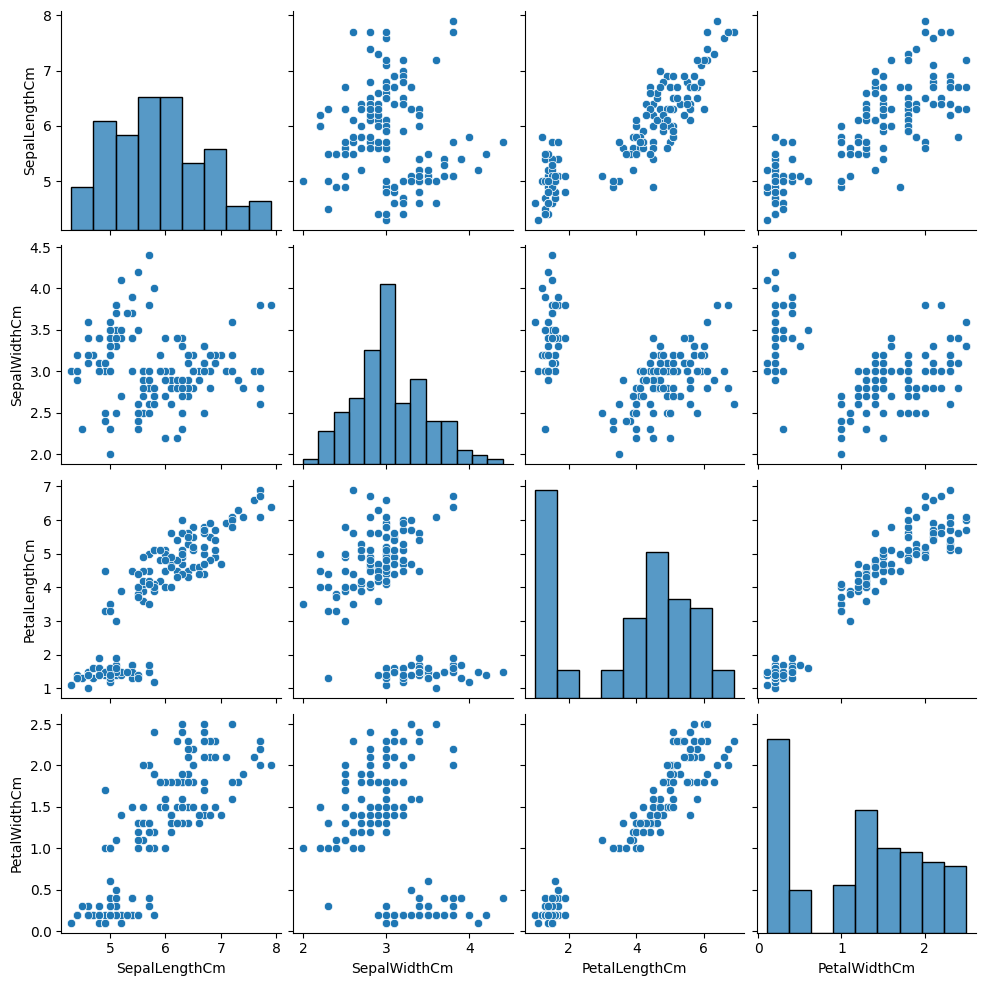

In [31]:
plt.figure(figsize = (10,5))
sns.pairplot(data)

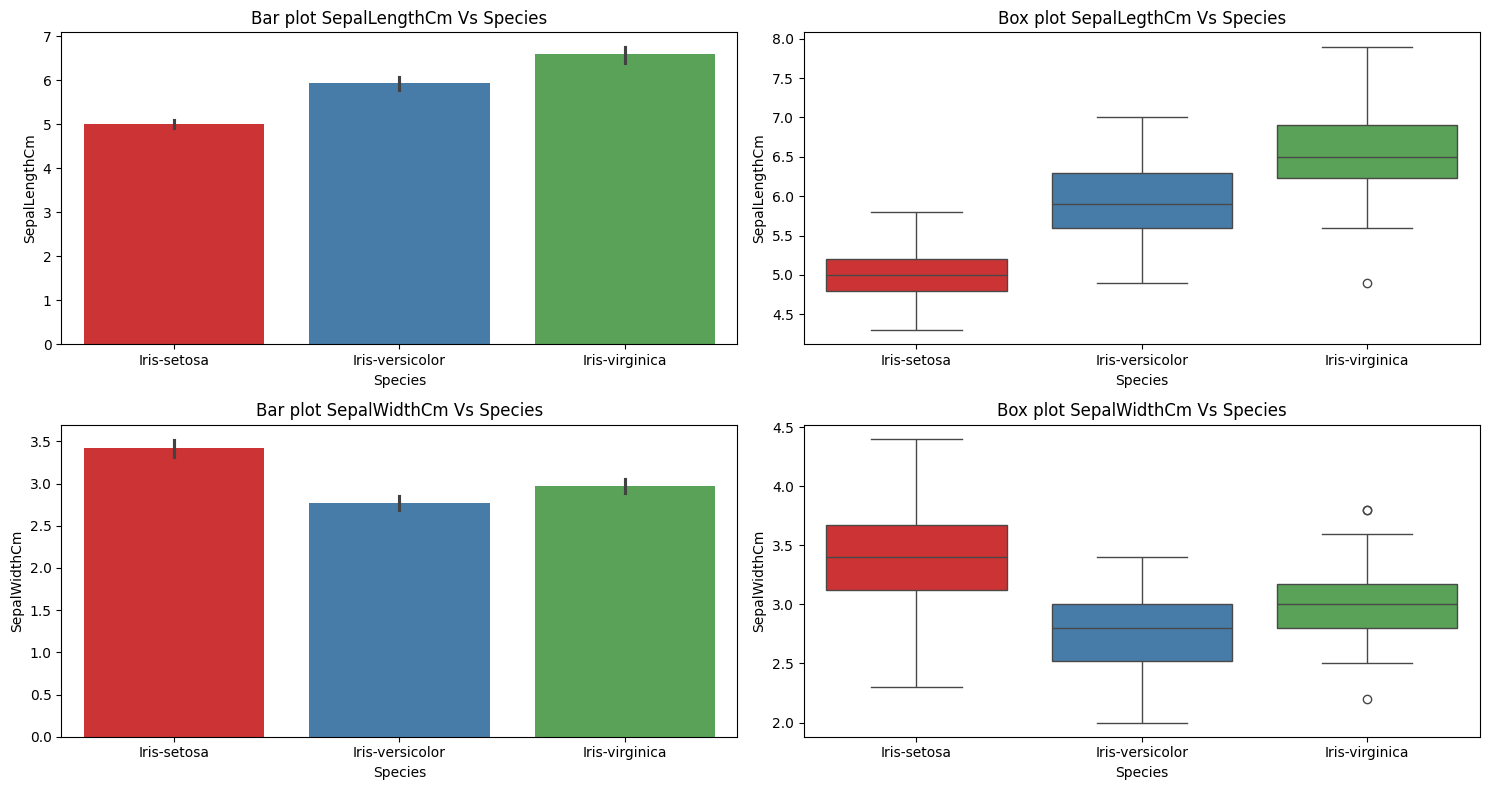

In [32]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.barplot(x="Species", y="SepalLengthCm", data=data, palette="Set1")
plt.title("Bar plot SepalLengthCm Vs Species")
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="SepalLengthCm", data=data, palette="Set1")
plt.title("Box plot SepalLegthCm Vs Species")
plt.subplot(2, 2, 3)
sns.barplot(x="Species", y="SepalWidthCm", data=data, palette="Set1")
plt.title("Bar plot SepalWidthCm Vs Species")
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="SepalWidthCm", data=data, palette="Set1")
plt.title("Box plot SepalWidthCm Vs Species")
plt.tight_layout()
plt.show()

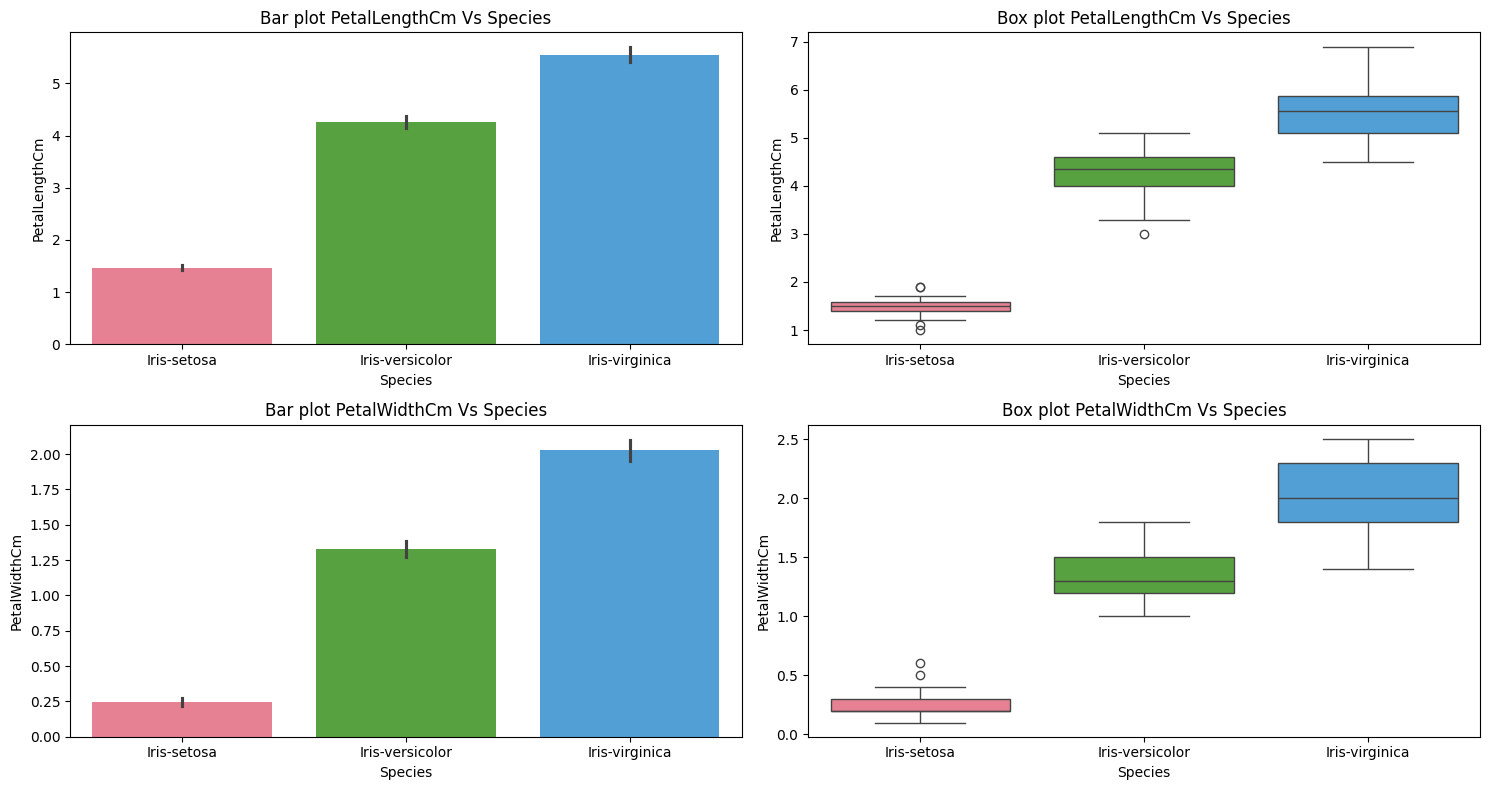

In [33]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.barplot(x="Species", y="PetalLengthCm", data=data, palette="husl")
plt.title("Bar plot PetalLengthCm Vs Species")
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="PetalLengthCm", data=data, palette="husl")
plt.title("Box plot PetalLengthCm Vs Species")
plt.subplot(2, 2, 3)
sns.barplot(x="Species", y="PetalWidthCm", data=data, palette="husl")
plt.title("Bar plot PetalWidthCm Vs Species")
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="PetalWidthCm", data=data, palette="husl")
plt.title("Box plot PetalWidthCm Vs Species")
plt.tight_layout()
plt.show()

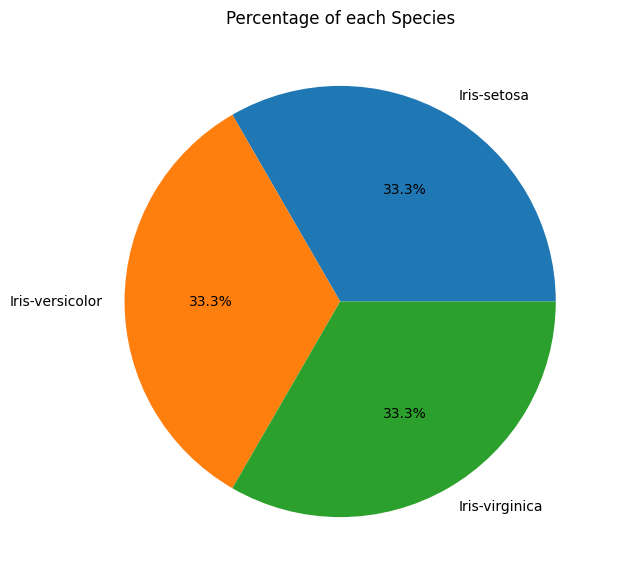

In [34]:
data["Species"].value_counts().plot(kind="pie",autopct = "%1.1f%%", figsize=(7,7))
plt.title("Percentage of each Species", fontsize = 12)
plt.ylabel("",fontsize=10)
plt.show()

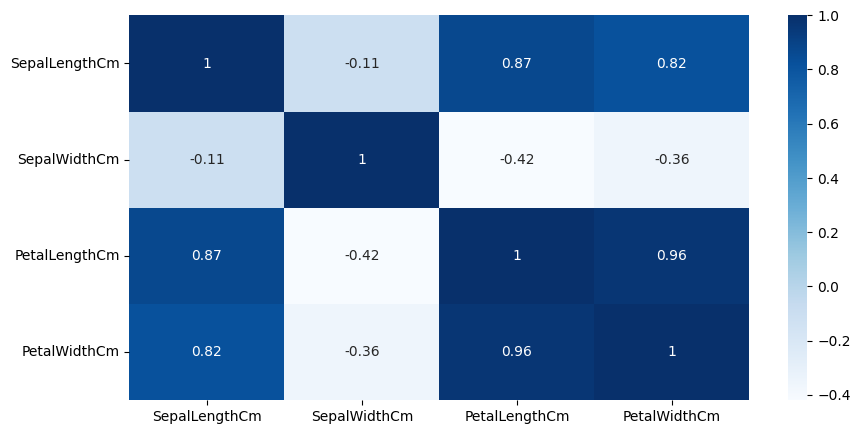

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(data.drop('Species', axis=1).corr(),annot=True,cmap = 'Blues')
plt.show()

In [36]:
X= data.drop(columns=['Species'])
Y= data ['Species']
X_train, X_test, y_train, y_test =train_test_split(X,Y,test_size=0.30, random_state=0)

In [37]:
model_Lr= LogisticRegression()
model_Lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
accuracy=model_Lr.score(X_test,y_test)*100
print("Accuracy:", accuracy)

Accuracy: 97.77777777777777


In [39]:
y_ptrain = model_Lr.predict(X_train)
y_ptrain

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-vir

In [40]:
print("Training Accuracy=", accuracy_score(y_train,y_ptrain)*100)
y_ptest = model_Lr.predict(X_test)
print("Test Accuracy=", accuracy_score(y_ptest,y_test)*100)

Training Accuracy= 98.09523809523809
Test Accuracy= 97.77777777777777


In [41]:
model1=KNeighborsClassifier()
model1.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
print("Accuracy=",model1.score(X_test,y_test)*100)
print(classification_report(y_test,y_ptest))

Accuracy= 97.77777777777777
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [43]:
cm =confusion_matrix(y_ptest,y_test)
print("Confusion Matrix: \n",cm)

Confusion Matrix: 
 [[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]


In [44]:
accuracy_train =accuracy_score(y_train,y_ptrain)
print("Accuracy Score for train=", accuracy_train)
accuracy_test =accuracy_score(y_test, y_ptest)
print("Accuracy Score for test=" ,accuracy_test)

Accuracy Score for train= 0.9809523809523809
Accuracy Score for test= 0.9777777777777777


In [45]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
print("Accuracy: ",model2.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [46]:
model3 = SVC()
model3.fit(X_train,y_train)
print("Accuracy: ",model3.score(X_test, y_test) * 100)

Accuracy:  97.77777777777777


In [47]:
model4 = GaussianNB()
model4.fit(X_train,y_train)
print("Accuracy: ",model4.score(X_test, y_test) * 100)

Accuracy:  100.0
